### Top 10 Brunch Places in DC

#### Sunday brunch is a religion in DC. A perfect date day should always start with a heart-warming brunch. So, we went on a mission to make this easy for everyone to find and enjoy.

#### Part 1. We propose to use Yelp as our first data source. With Yelp having most of the information we need - Restaurant Info, Price Range and Reviews - we found this as a great guide to begin our search. The code below is what we used to webscrape Yelp and the result is "breakfast.csv" file.

In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import numpy as np
from sklearn import linear_model
from sklearn.metrics import r2_score
from matplotlib import cm  
from mpl_toolkits.mplot3d import *
from bs4 import BeautifulSoup as bs
import re
import time


def step1(url):
    time.sleep(3)
    myList = []
    filename=str(url)
    pos=filename.find('=')
    pos2=filename.find('+')
    filename=filename[pos+1:pos2]
    while(url):
        time.sleep(3)
        r = requests.get(url)
        data = r.text    
        soup = bs(data, "html.parser")
        lists=soup.findAll('li',{'class':'regular-search-result'})
        for list in lists:
            restaurants = list.findAll('div',{'class':'search-result natural-search-result'})
            for restaurant in restaurants:        
                c = []
                #extract the restaurant Name
                name = restaurant.find('a',{'data-analytics-label':'biz-name'})
                c.append(name.getText().strip())
                
                #extract the address
                address = restaurant.select("address")
                address = str(address)
                street = re.search('\n            (.+?)<br>',address)
                if street is None:
                    c.append('None') #street
                    city = re.search('<br>(.+?),',address)
                    if city is None:
                        c.append('') #city
                        c.append('None') #state
                        c.append('None') #zip
                    elif city is not None:
                        city = re.search('<br>(.+?),',address).group(1)
                        c.append(city)
                        state = re.search(',(.+?)',address)
                        if state is not None:
                            state = state.group(1)
                            c.append(state)
                            zip = re.search(' (\d{5})\n',address)
                            if zip is not None:
                                zip = zip.group(1)
                                c.append(zip)
                            elif zip is None:
                                c.append('None')
                        elif state is None:
                            c.append('None')
                            c.append('None')
                elif street is not None:
                    street = re.search('\n            (.+?)<br>',address).group(1)
                    c.append(street)
                    city = re.search('<br>(.+?),',address).group(1)
                    city = re.search('<br>(.+?),',address)
                    if city is None:
                        c.append('None') #city
                        c.append('None') #state
                        c.append('None') #zip
                    elif city is not None:
                        city = re.search('<br>(.+?),',address).group(1)
                        c.append(city)
                        state = re.search(',(.+?) ',address)
                        if state is not None:
                            state = state.group(1)
                            c.append(state)
                            zip = re.search(' (\d{5})\n',address)
                            if zip is not None:
                                zip = zip.group(1)
                                c.append(zip)
                            elif zip is None:
                                c.append('None')
                        elif state is None:
                            c.append('None')
                            c.append('None')           
                #get the phone number
                phone = restaurant.find('span',{'class':'biz-phone'})
                c.append(phone.getText().strip())
                #get review number
                reviewNum = restaurant.find('span',{'class':'review-count rating-qualifier'})
                if reviewNum is not None:
                    reviewNum = reviewNum.getText().strip().split(' ')
                    c.append(int(reviewNum[0]))
                else:
                    c.append('')
                #get rating stars
                rating = restaurant.find('div',{'class':'rating-large'})
                if rating is not None:
                    rating = rating.img.get('alt')
                    rating = rating.split(' ')
                    c.append(float(rating[0]))
                if rating is None:
                    c.append('')
                #get price
                price = restaurant.find('span',{'class':'bullet-after'})
                if price is not None:
                    c.append(price.getText().strip())
                if price is None:
                    c.append('')

                myList.append(c)
        nexturl = soup.find('a',{'class':'u-decoration-none next pagination-links_anchor'})
        if nexturl is None:
            #add the heading
            headings = ['Name', 'StreetAddress','City','State','Zip','Phone','NumberofReviews','Rating','PriceRanges']
            df = pd.DataFrame(myList, columns=headings)
            #save to csv file
            df.to_csv(filename+'.csv')
            return(df)
            break
        else:
            nexturl = nexturl.get('href')
            url = "https://www.yelp.com"+nexturl

#### We decided to make our code adaptable so the url will be a user input instead of us fixing the website link within the code.

In [2]:
url="https://www.yelp.com/search?find_desc=Breakfast+%26+Brunch&find_loc=Washington,+DC"

In [3]:
step1(url)

,Name,StreetAddress,City,State,Zip,Phone,NumberofReviews,Rating,PriceRanges
0,A Baked Joint,None,Washington,,20001,(202) 408-6985,511,4.5,$
1,Wicked Waffle,None,Washington,,20006,(202) 944-2700,657,4,$
2,Moxie’s,None,Washington,,20036,(202) 846-1479,39,4.5,$
3,Founding Farmers DC,None,Washington,,20006,(202) 822-8783,8422,4,$$
4,Tabard Inn Restaurant,None,Washington,,20036,(202) 331-8528,1366,4,$$
5,Busboys and Poets,None,Washington,,20009,(202) 387-7638,1585,4,$$
6,Highlands,None,Washington,,20011,(202) 829-6200,297,4,$
7,Old Ebbitt Grill,None,Washington,,20005,(202) 347-4800,4953,4,$$
8,Brick Lane,None,Washington,,20009,(202) 525-5309,100,4,$$
9,City Place Cafe,None,Washington,,20036,(202) 466-4665,119,4.5,$


#### Using csvkit, we did a preliminary examination of the data acquired. First thing to do is to look at the headers. From here we can say that we have majority of the information that we need. We also ran a quick stat summary and look at the first 10 data points that we will be working with.

In [4]:
!csvcut -n Breakfast.csv

  1: 
  2: Name
  3: StreetAddress
  4: City
  5: State
  6: Zip
  7: Phone
  8: NumberofReviews
  9: Rating
 10: PriceRanges


In [5]:
!csvstat Breakfast.csv

  1. _unnamed
	<class 'int'>
	Nulls: False
	Min: 0
	Max: 964
	Sum: 465130
	Mean: 482.0
	Median: 482
	Standard Deviation: 278.57135531134566
	Unique values: 965
  2. Name
	<class 'str'>
	Nulls: False
	Unique values: 721
	5 most frequent values:
		IHOP:	18
		Panera Bread:	8
		Corner Bakery Cafe:	7
		Pret A Manger:	7
		Bruegger’s Bagels:	7
	Max length: 45
  3. StreetAddress
	<class 'NoneType'>
	Nulls: True
	Values: 
  4. City
	<class 'str'>
	Nulls: True
	Unique values: 44
	5 most frequent values:
		Washington:	531
		Arlington:	98
		Alexandria:	84
		Bethesda:	40
		Silver Spring:	32
	Max length: 16
  5. State
	<class 'NoneType'>
	Nulls: True
	Values: 
  6. Zip
	<class 'int'>
	Nulls: True
	Min: 20001
	Max: 22315
	Sum: 19947711
	Mean: 20757.24349635796
	Median: 20036
	Standard Deviation: 943.3304192802727
	Unique values: 91
	5 most frequent values:
		20009:	71
		20001:	68
		20036:	46
		20005:	44
		22314:	44
  7. Phone
	<class 'str'>
	Nulls: True
	Unique values: 789
	5 most frequent values:
		

In [6]:
!csvcut -c1,6,8,9,10 Breakfast.csv | head | csvlook

|----+-------+-----------------+--------+--------------|
|    | Zip   | NumberofReviews | Rating | PriceRanges  |
|----+-------+-----------------+--------+--------------|
|  0 | 20001 | 509             | 4.5    | $            |
|  1 | 20006 | 657             | 4.0    | $            |
|  2 | 20036 | 39              | 4.5    | $            |
|  3 | 20006 | 8420            | 4.0    | $$           |
|  4 | 20036 | 1367            | 4.0    | $$           |
|  5 | 20009 | 1584            | 4.0    | $$           |
|  6 | 20011 | 297             | 4.0    | $            |
|  7 | 20005 | 4949            | 4.0    | $$           |
|  8 | 20009 | 100             | 4.0    | $$           |
|----+-------+-----------------+--------+--------------|


#### Part 2. SQL Analysis

#### SQL is a powerful analysis tool to examine data. We found the top 50 restaurants according to ratings received, first 10 data points, and top 20 by number of reviewers, 

In [7]:
%load_ext sql

In [8]:
%sql sqlite:///breakfast.db

'Connected: None@breakfast.db'

In [9]:
!csvsql --db sqlite:///breakfast.db --insert Breakfast.csv

In [10]:
%%sql
SELECT Name, Rating
FROM Breakfast
ORDER BY Rating DESC
LIMIT 50;

Done.


Name,Rating
USDA Cafeteria,5.0
Hilton Honors Capital Hilton Executive Lounge,5.0
DC Dives,5.0
Enbela Market & Carry Out,5.0
Heat Da Spot,5.0
Enbela Market & Carry Out,5.0
Fresh Deli,5.0
Calabash,5.0
Nazret Express Eaterey,5.0
Nazret Express Eaterey,5.0


In [35]:
%%sql
SELECT Name, NumberofReviews
FROM Breakfast
ORDER BY NumberofReviews DESC
LIMIT 20;

Done.


Name,NumberofReviews
Founding Farmers DC,8420
Old Ebbitt Grill,4949
Ben’s Chili Bowl,3249
Ben’s Chili Bowl,3249
Baked & Wired,2977
Farmers Fishers Bakers,1812
Le Diplomate,1782
Blue Duck Tavern,1598
Busboys and Poets,1584
Ted’s Bulletin,1493


In [14]:
%%sql
SELECT COUNT(Zip)
FROM Breakfast;

Done.


COUNT(Zip)
961


In [15]:
%%sql
SELECT Name, Rating,NumberofReviews, PriceRanges
FROM Breakfast
ORDER BY NumberofReviews DESC
LIMIT 20;

Done.


Name,Rating,NumberofReviews,PriceRanges
Founding Farmers DC,4.0,8420,$$
Old Ebbitt Grill,4.0,4949,$$
Ben’s Chili Bowl,3.5,3249,$
Ben’s Chili Bowl,3.5,3249,$
Baked & Wired,4.5,2977,$$
Farmers Fishers Bakers,4.0,1812,$$
Le Diplomate,4.0,1782,$$$
Blue Duck Tavern,4.0,1598,$$$
Busboys and Poets,4.0,1584,$$
Ted’s Bulletin,4.0,1493,$$


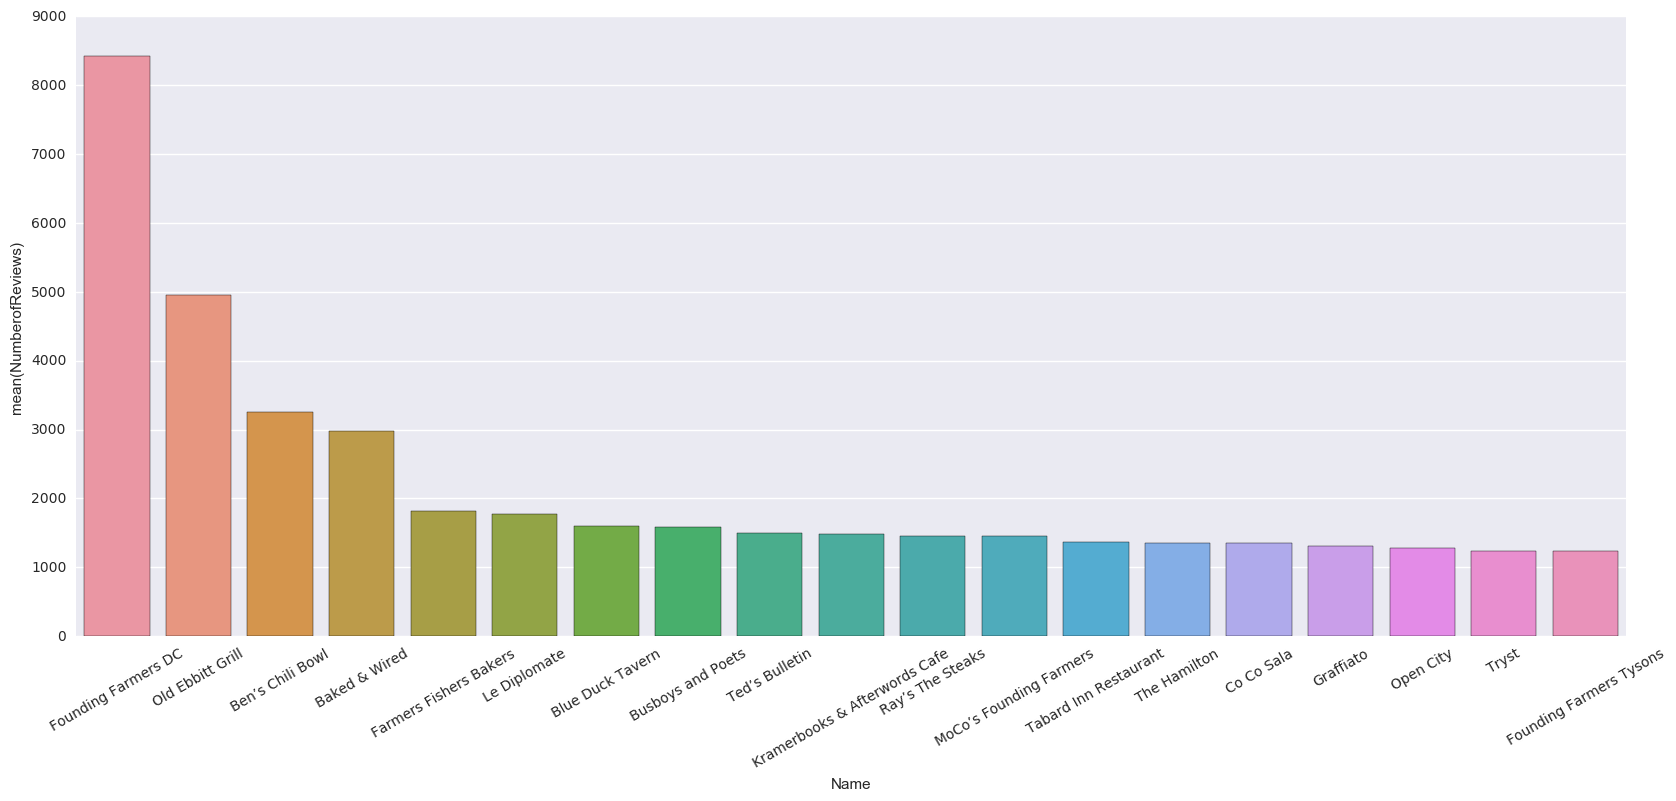

In [17]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import rc

d = _.DataFrame()
rc('figure', figsize=(20, 8))
splt = sns.barplot(x='Name', y='NumberofReviews', data=d)
labels = [l for l in splt.get_xmajorticklabels()]
splt.set_xticklabels(labels, rotation=30)

In [34]:
%%sql
SELECT Name, Rating,NumberofReviews, PriceRanges
FROM Breakfast
ORDER BY Rating DESC
LIMIT 20;

Done.


Name,Rating,NumberofReviews,PriceRanges
USDA Cafeteria,5.0,11,$
Hilton Honors Capital Hilton Executive Lounge,5.0,2,$
DC Dives,5.0,1,$
Enbela Market & Carry Out,5.0,1,None
Heat Da Spot,5.0,43,$
Enbela Market & Carry Out,5.0,1,None
Fresh Deli,5.0,5,$
Calabash,5.0,147,$
Nazret Express Eaterey,5.0,2,None
Nazret Express Eaterey,5.0,2,None


### 3. Further regressions.

#### Here we investigate the data further. We wanted to see if there is some relationship between the variables.

#### We first take a look at the relationship of Number of Reveiws and the Resturant Rating, we did a simple linear regerssion. 

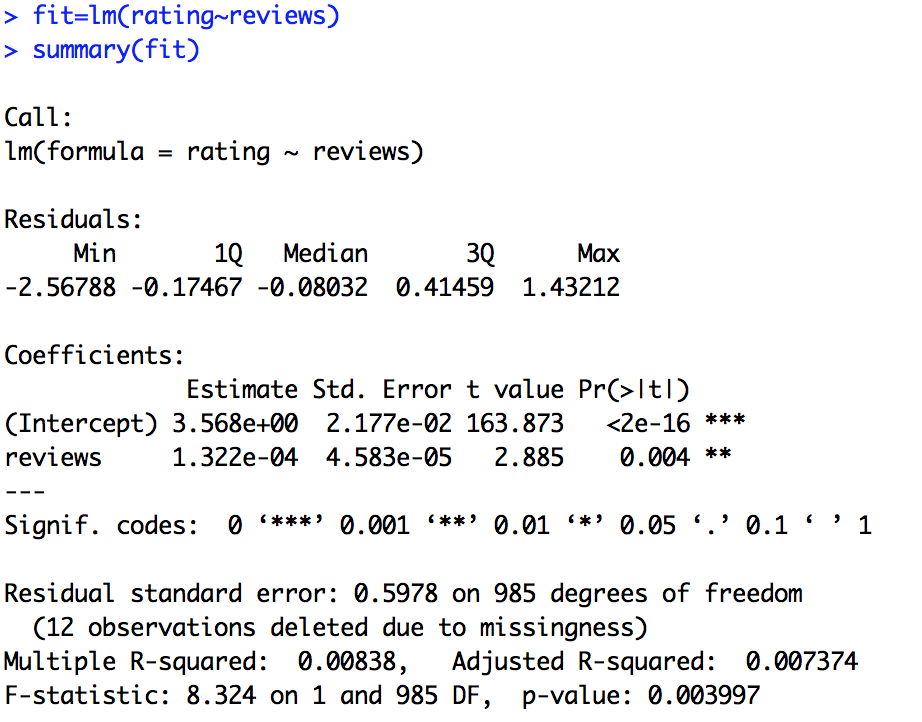

In [29]:
from IPython.display import Image
Image(filename='Picture1.png', width = 1000, height = 1000)

#### From the regression result, we know that p-value is statistically significant, so we are reasonably sure there is a realtionship between restaurant rating and number of reviews. However, the low multiple R-squared value suggests that predictablity of number of reviews is low, also the slopt is very small. 

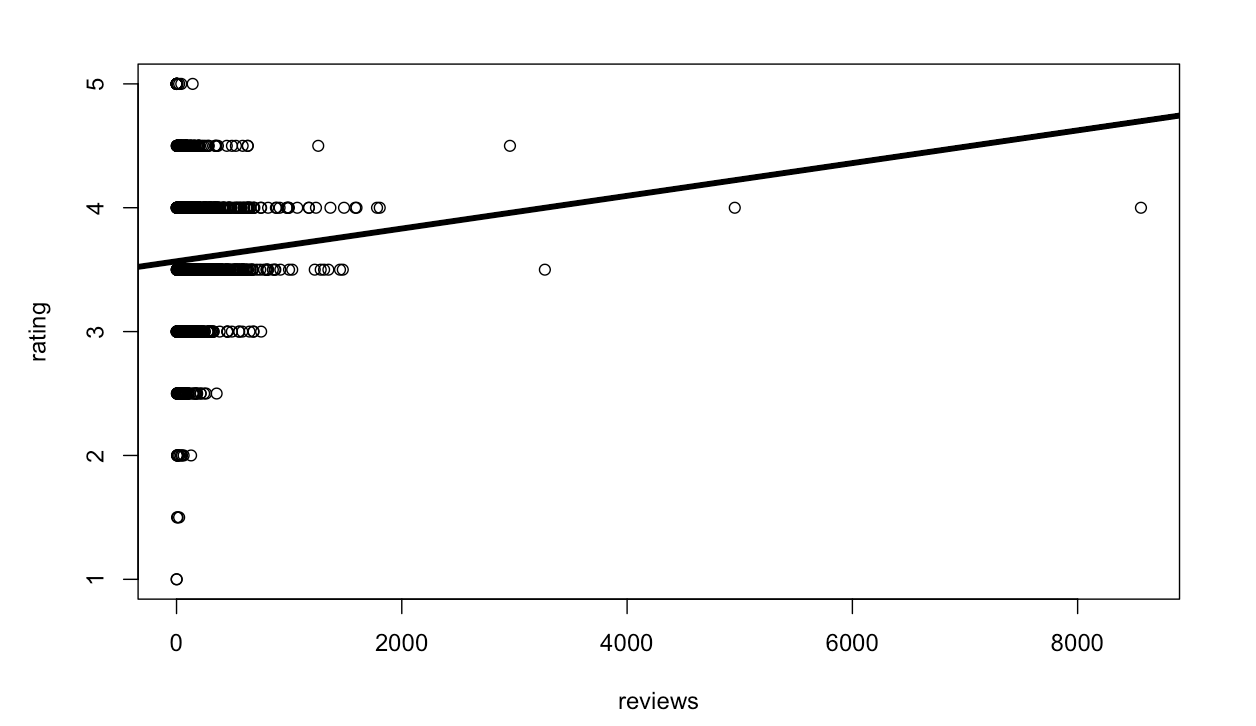

In [37]:
from IPython.display import Image
Image(filename='Picture2.png', width = 1000, height = 1000)

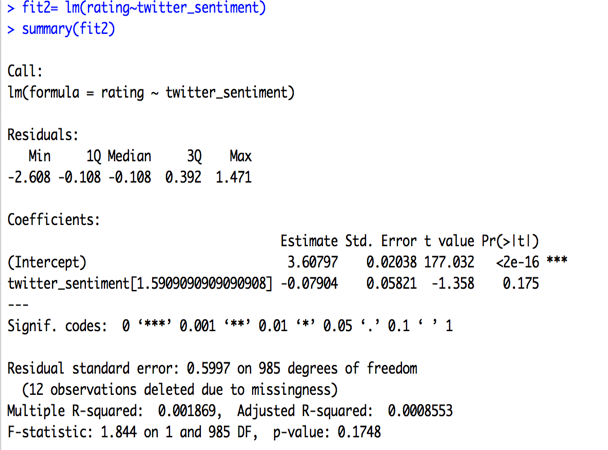

In [31]:
from IPython.display import Image
Image(filename='Picture3.png', width = 1000, height = 1000)

#### Now, we fit another regression line between rating and sentiment score, and we can see the p-value is not siginficant, with means that there is no linear relationship between rating and sentiment score.

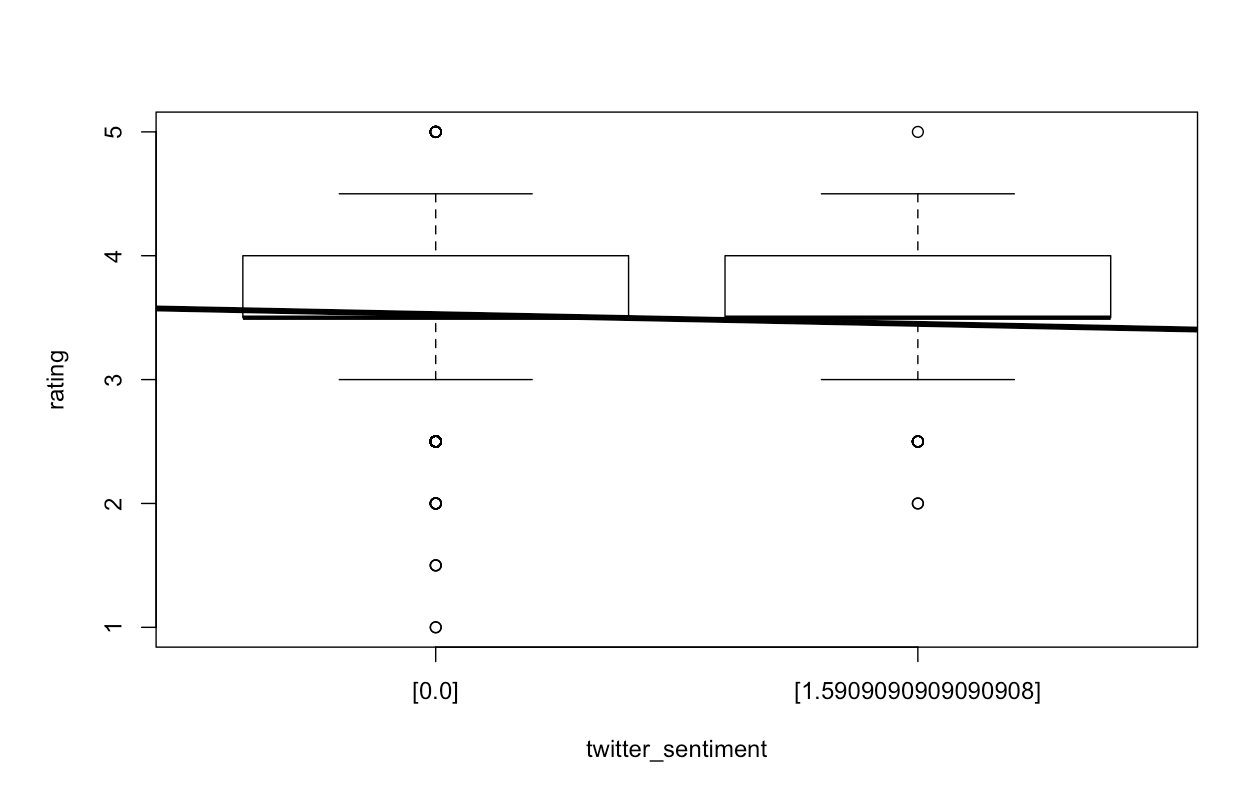

In [38]:
from IPython.display import Image
Image(filename='Picture4.png', width = 1000, height = 1000)

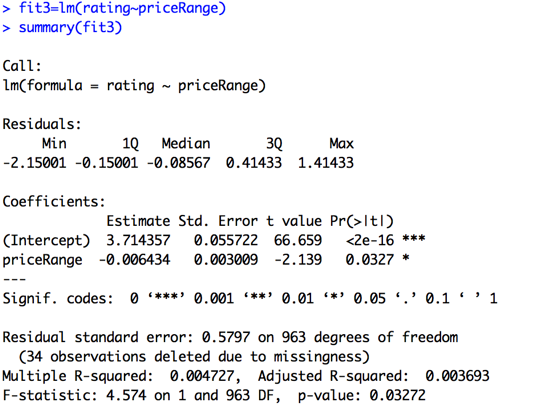

In [23]:
from IPython.display import Image
Image(filename='Picture5.png', width = 1000, height = 1000)

#### p-value is siginificant (less than 0.05), negatvie linear relatinship between Rating and PriceRange.However R square is pretty low also. 

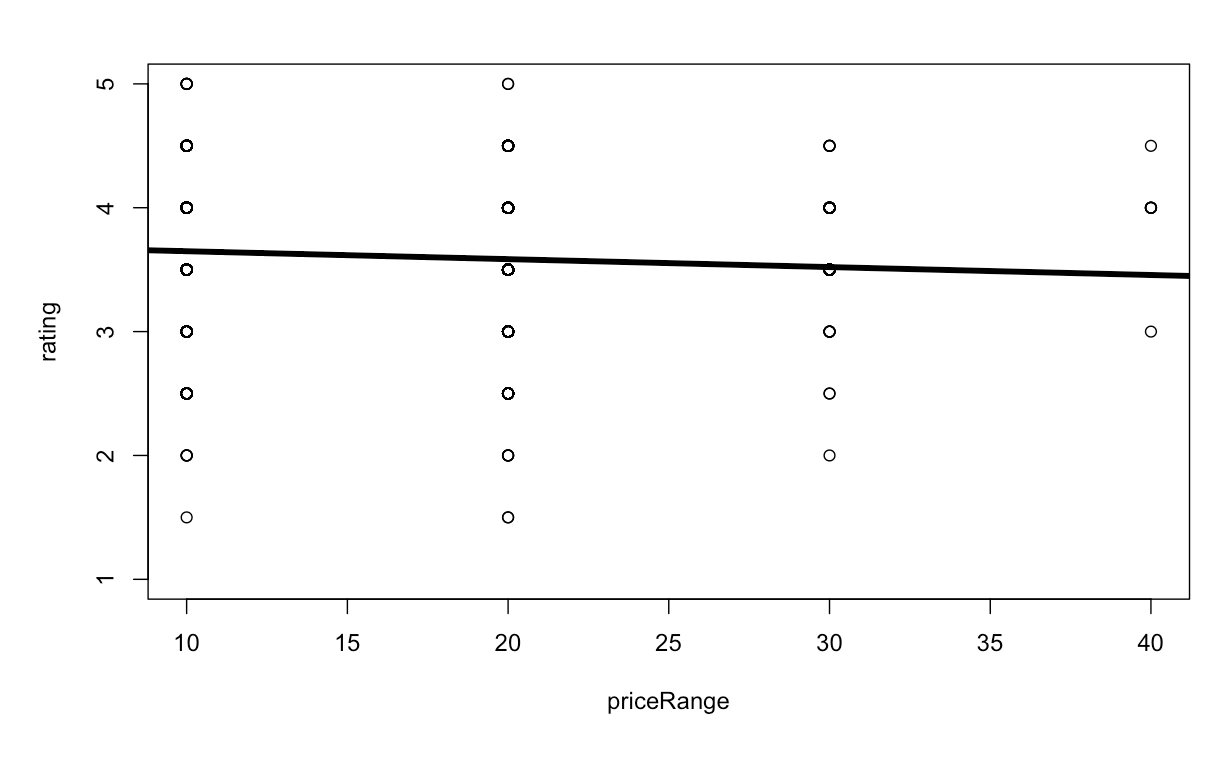

In [39]:
from IPython.display import Image
Image(filename='Picture6.png', width = 1000, height = 1000)

#### To sum up, Rating variable is not really depend on any other variables, which we think the rating is pretty fair becuase it denpends on the quality of the food. 

#### We then geolocated the restaurants using geocodio.